<a href="https://colab.research.google.com/github/luca-heltai/numerical-analysis-2020-2021/blob/master/notebooks/00-scratch-notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def FD(f, x, h):
  return (f(x+h)-f(x))/h

def CFD(f, x, h):
  return (f(x+h)-f(x-h))/(2*h)

def myfun(x):
  return sin(x)

def exact(x):
  return cos(x)

In [ ]:
x0 = 1

H = [2**(-i) for i in range(1,75)]
error  = [abs(exact(x0) -  FD(myfun, x0, h)) for h in H]
error2 = [abs(exact(x0) - CFD(myfun, x0, h)) for h in H]

In [16]:
_ = loglog(H, error, 'ro-')
_ = loglog(H, error2, 'bo-')

NameError: ignored

In [ ]:
sin(x0)

0.0009999998333333417

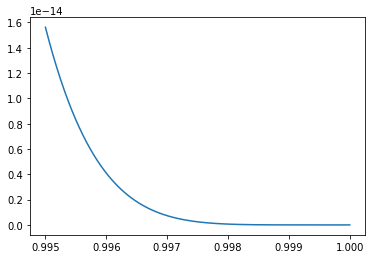

In [15]:
x = linspace(.995, 1,1029)

y = (x-1)**6

_ = plot(x,y)

In [11]:
import sympy as sp
X = sp.var('x')
Y = (1-x)**6
sp.expand(Y)

x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

In [12]:
# Copy from output above.
y = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

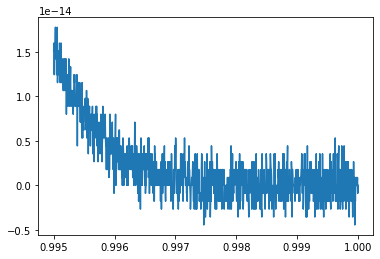

In [14]:
x = linspace(.995, 1,1029)
y = x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

_ = plot(x,y)